In [7]:
import numpy as np
cm_total = np.load("cm_total.npz")
cm = cm_total["cm_total"]
classes = cm_total["classes"]

Confusion matrix, without normalization
[[ 12878215   2309002  15615716    346091      2171         0         0
    1058899         0     39698]
 [   360820 125931921   2134140    382236    277361         0         0
     259288         0     34492]
 [   252928   1294425  15855505      6166         0         0         0
      71487         0       325]
 [      437    838794         0  16431077      7629         0         0
      45517         0      9545]
 [        0   3685064         0     13543    529519         0         0
    2712464         0       874]
 [        0    654884         0        96     15064         0         0
     180897         0         0]
 [   145766    487358    332532     21938         0         0         0
       5616         0      1623]
 [       91    461759    144504     23469         0         0         0
     131416         0      3060]
 [     2870     14302         0      2001      2779         0         0
       3937         0         0]
 [      527    

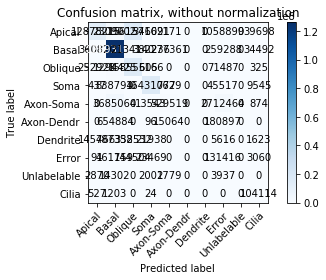

In [3]:
%matplotlib inline
import celii_confusion_plotting as cp
cp.plot_confusion_matrix_from_confusion_matrix(cm,classes=classes)


In [4]:
import seaborn as sns
sns.set()

In [6]:
cm

array([[ 12878215,   2309002,  15615716,    346091,      2171,         0,
                0,   1058899,         0,     39698],
       [   360820, 125931921,   2134140,    382236,    277361,         0,
                0,    259288,         0,     34492],
       [   252928,   1294425,  15855505,      6166,         0,         0,
                0,     71487,         0,       325],
       [      437,    838794,         0,  16431077,      7629,         0,
                0,     45517,         0,      9545],
       [        0,   3685064,         0,     13543,    529519,         0,
                0,   2712464,         0,       874],
       [        0,    654884,         0,        96,     15064,         0,
                0,    180897,         0,         0],
       [   145766,    487358,    332532,     21938,         0,         0,
                0,      5616,         0,      1623],
       [       91,    461759,    144504,     23469,         0,         0,
                0,    131416,        

In [22]:
def plot_confusion_matrix_from_confusion_matrix(cm, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    This version takes in a confusion matrix
    
    Example: 
    Example: 
    y_true = [0, 0, 1, 1, 2, 0, 1]
    y_pred = [0, 1, 0, 1, 2, 2, 1]
    C = confusion_matrix(y_true, y_pred)
    
    classes = np.array(["Apical","Basal","Oblique"])
    plot_confusion_matrix_from_confusion_matrix(C,normalize=True,classes=classes,
                     title="Brendan's Confusion")
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #**** don't need to do any editing to the classes **** #
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    fig.set_size_inches(20, 12)
    ax.grid(False)
    return ax

Normalized confusion matrix
[[3.99327072e-01 7.15974230e-02 4.84211371e-01 1.07315731e-02
  6.73182636e-05 0.00000000e+00 0.00000000e+00 3.28342893e-02
  0.00000000e+00 1.23095368e-03]
 [2.78883352e-03 9.73347271e-01 1.64950977e-02 2.95436109e-03
  2.14376601e-03 0.00000000e+00 0.00000000e+00 2.00407701e-03
  0.00000000e+00 2.66593996e-04]
 [1.44688732e-02 7.40482320e-02 9.07022124e-01 3.52729126e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.08944973e-03
  0.00000000e+00 1.85917882e-05]
 [2.52120248e-05 4.83928950e-02 0.00000000e+00 9.47965035e-01
  4.40143105e-04 0.00000000e+00 0.00000000e+00 2.62603142e-03
  0.00000000e+00 5.50683699e-04]
 [0.00000000e+00 5.30877060e-01 0.00000000e+00 1.95102935e-03
  7.62834756e-02 0.00000000e+00 0.00000000e+00 3.90762525e-01
  0.00000000e+00 1.25910039e-04]
 [0.00000000e+00 7.69599772e-01 0.00000000e+00 1.12816282e-04
  1.77027550e-02 0.00000000e+00 0.00000000e+00 2.12584656e-01
  0.00000000e+00 0.00000000e+00]
 [1.46523085e-01 4.89889258e-0

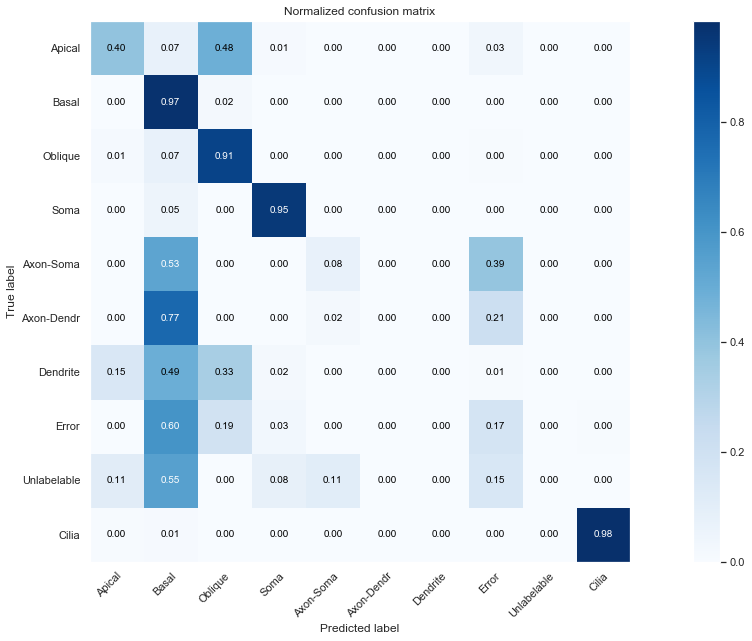

In [23]:
%matplotlib inline
import celii_confusion_plotting as cp
plot_confusion_matrix_from_confusion_matrix(cm,classes=classes)


In [9]:

# import matplotlib.pyplot as plt

# ax= plt.subplot()
# sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# # labels, title and ticks
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);